    INFO : 2020-05-20 06:03:59,524 : start: set_dataset
    INFO : 2020-05-20 06:03:59,525 : start: add_column_trend
    INFO : 2020-05-20 06:03:59,526 : start: add_column_extreme_60_later
    INFO : 2020-05-20 06:03:59,527 : start: add_column_next_extreme
    INFO : 2020-05-20 06:03:59,528 : start: add_columns_close_ratio
    INFO : 2020-05-20 06:03:59,529 : start: add_columns_time
    INFO : 2020-05-20 06:03:59,531 : start: convert_hlc_to_ratio
    INFO : 2020-05-20 06:04:59,609 : start: remove_missing_rows
    INFO : 2020-05-20 06:05:58,877 : end: set_dataset


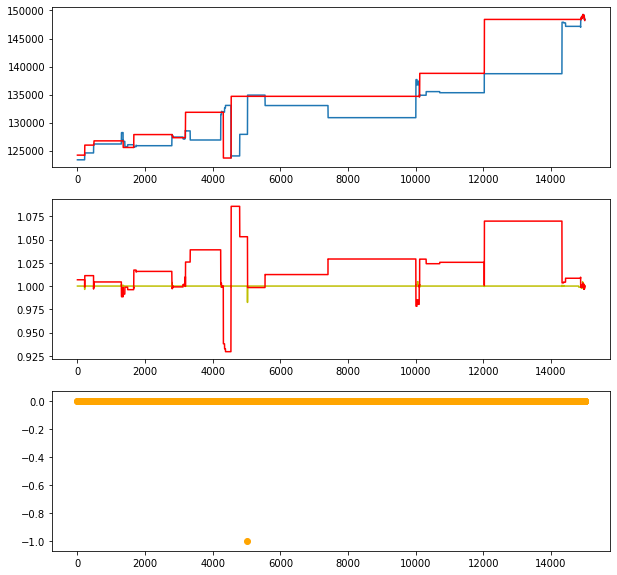

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime as dt
from mylib import dataset
%matplotlib inline

def plot(data):
    x = data[:15000]
    y_close = list(x["close"])
    y_result = list(x["extreme60"])
    y_next = list(x["next_extreme"])
    y_next_ratio = list(x["next_extreme_ratio"])
    y_action = [(1 if i > 1 else -1) if i > 1.005 or i < 0.995 else 0 for i in y_result]

    _, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(10, 10))
    ax1.plot(list(range(len(x))), y_close)
    ax1.plot(list(range(len(x))), y_next, 'r')
    ax2.plot(list(range(len(x))), y_result, 'y')
    ax2.plot(list(range(len(x))), y_next_ratio, 'r')
    ax3.scatter(list(range(len(x))), y_action, color="orange")
    plt.show()

def main():
    csv = pd.read_csv("datasets/v0.0.11.csv")
    b = dataset.BitcoinDataset("v0.0.11-test")
    b.set_dataset(csv)
    plot(b.data)


if __name__ == "__main__":
    main()

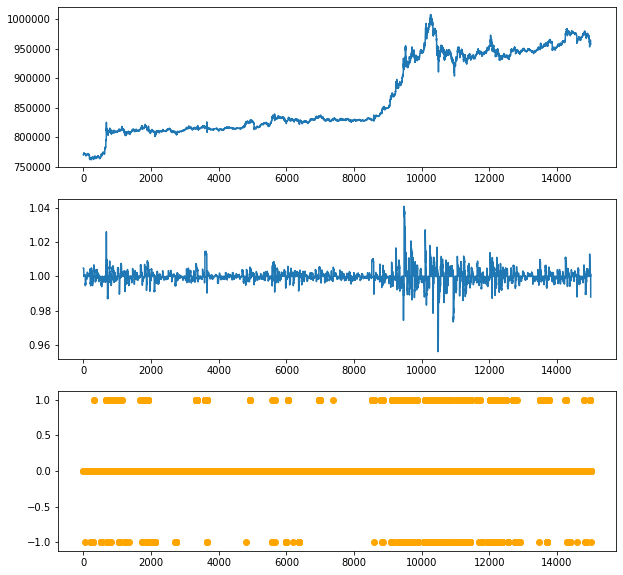

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime as dt
from mylib import dataset

def plot(data):
    x = data[-15000:]
    y_close = list(x["close"])
    y_result = list(x["extreme60"])
    y_action = [(1 if i > 1 else -1) if i > 1.005 or i < 0.995 else 0 for i in y_result]

    _, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(10, 10))
    ax1.plot(list(range(len(x))), y_close)
    ax2.plot(list(range(len(x))), y_result)
    ax3.scatter(list(range(len(x))), y_action, color="orange")
    plt.show()

csv = pd.read_csv("datasets/v0.0.10-2.csv")
# csv.drop(columns=["extreme60"], inplace=True)
#b = dataset.BitcoinDataset("v0.0.10-2")
#b.set_dataset(csv)
plot(csv)

145


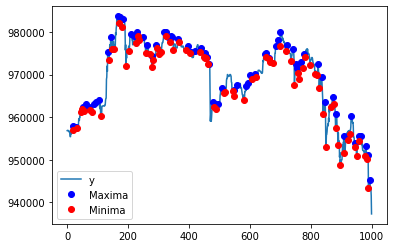

In [68]:
import pandas as pd
import numpy as np
import random
from scipy import signal
import matplotlib.pyplot as plt

csv = pd.read_csv("datasets/candlestick.csv")
data = csv['close'][-1000:]
x = list(range(len(data)))
y = data.values
#print(y)
# s = pd.Series([random.randint(0, 10) for _ in range(10)])
#print(s)
#s.rolling(window=3, center=True).mean()
#np.random.randn(100)
maxid = signal.argrelmax(y, order=3)
minid = signal.argrelmin(y, order=3)
t = np.concatenate([maxid[0], minid[0]])
#t = t.sort(axis=0)
#t = list(t)
print(len(np.sort(t)))
#print(y[maxid])

plt.plot(x, y, label='y')
plt.plot(maxid[0], y[maxid], 'bo', label='Maxima')
plt.plot(minid[0], y[minid], 'ro', label='Minima')
plt.legend()
plt.show()